# Invariantin massan histogrammin piirtäminen painotuksilla

Tässä harjoituksessa opetellaan piirtämään invariantin massan histogrammi Pythonilla. Käytetään datana CMS-kokeen vuonna 2011 keräämää dataa kahden myonin törmäyksistä [1]. Tässä harjoituksessa käytettävään CSV-tiedostoon on karsittu edellä mainitusta datasta kiinnostavia tapahtumia, joissa myonille laskettu invariantti massa on välillä 0.3–300 GeV [2].

Tutustu alla oleviin koodisoluihin ja niissä #-merkillä erotettuihin kommenttiriveihin sekä aja koodia. Huomaa, että normaalisti koodia ei kommentoitaisi näin runsaasti, nyt kommenteissa kerrotaan lisätietoa käytetyistä komennoista.
<br>
<br>
<br>
[1] CMS collaboration (2016). DoubleMu primary dataset in AOD format from RunA of 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. DOI: [10.7483/OPENDATA.CMS.RZ34.QR6N](http://doi.org/10.7483/OPENDATA.CMS.RZ34.QR6N).
<br>[2] Thomas McCauley (2016). Dimuon. Jupyter Notebook file. https://github.com/tpmccauley/cmsopendata-jupyter/blob/hst-0.1/Dimuon.ipynb.

### 1) Alustus

In [2]:
# Haetaan tarvittavat moduulit ja käytetään magic-komentoa '%matplotlib inline', joka mahdollistaa
# histogrammin piirtämisen suoraan koodisolun tulosteeseen.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Jos notebookia käytetään Python 2:lla, tarvitaan histogrammin teksteihin tuki ääkkösille.
from __future__ import unicode_literals

### 2) Datan hakeminen

In [3]:
# Luodaan DataFrame-rakenne (periaatteessa taulukko), johon kirjataan kaikki CSV-tiedostossa oleva data.
# Annetaan luomallemme DataFramelle nimi 'datasetti'.
datasetti = pd.read_csv('data/DoubleMuRun2011A.csv')

# Luodaan muuttuja 'inv_massa', johon tallennetaan 'datasetin' sarakkeella 'M' olevat arvot, eli
# kahden myonin invariantille massalle valmiiksi tiedostoon lasketut arvot.
inv_massa = datasetti['M']

### 3) Histogrammin valmistelu

In [7]:
# Asetetaan histogrammin pylväiden (binien) lukumäärä.
binien_lkm = 500

# Tehdään tarvittavat painotukset.
from __future__ import division    # Haetaan Python 2:sta varten päivitetty jakolaskuoperaattori.
painot = []
for a in inv_massa:
    painot.append(binien_lkm/np.log(10)/a)

# Otetaan jokaisen invariantin massan arvosta kymmenkantainen logaritmi. Tallennetaan nämä
# arvot muuttujaan 'inv_massa_log'.
inv_massa_log = np.log10(inv_massa)

### 4) Histogrammin piirtäminen painotuksilla

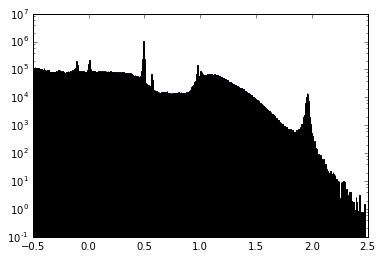

In [16]:
# Suoritetaan histogrammin piirtäminen pyplot-moduulin avulla:
# (http://matplotlib.org/api/pyplot_api.html?highlight=matplotlib.pyplot.hist#matplotlib.pyplot.hist).
# 'Bins' määrittelee histogrammin pylväiden lukumäärän, range x-akselin rajat ja weights painotukset.

plt.hist(inv_massa_log, bins=binien_lkm, range=(-0.5,2.5), weights=painot)

# Asetetaan y-akseli logaritmiseksi ja piirretään histogrammi.
plt.yscale('log')
plt.show()

### 5) Histogrammi ilman painotuksia

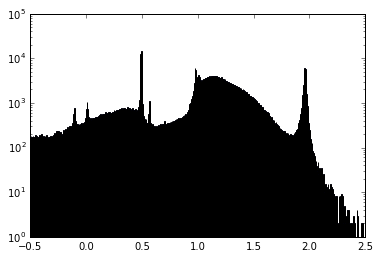

In [17]:
plt.hist(inv_massa_log, bins=binien_lkm, range=(-0.5,2.5))

plt.yscale('log')
plt.show()